# College Students' Dietary Habits and Academic Performance


## Abstract

In this research project, we delved into the relationship between dietary habits and academic performance among college students, employing a multifaceted methodological approach that included exploratory data analysis, multiple linear regression models, t-tests, and machine learning prediction models. As undergraduate students of UCSD, we were motivated to uncover the truths surrounding dietary habits and their correlation to academic success. We believed that if we found positive conclusive results, we would be one step closer to improving daily quality of life for our peers and future prospective students.  Our findings highlighted a statistically significant positive correlation between the consumption of fruits and higher GPAs, while revealing negative correlations for fast food and energy drink consumption. Despite these insights, the attempt to predict GPA based solely on dietary intake through machine learning faced challenges, underscoring the complexity of academic success determinants. This study contributes to the understanding of the impact of dietary choices on academic performance, suggesting the potential benefits of healthier eating habits for cognitive function and academic success, while also highlighting the need for further research that incorporates a broader range of influencing factors.

## Research Question

To what extent is there a relationship between dietary habits and academic performance among college students, and is it possible to predict a student's GPA based on their nutritional intake?

## Background and Prior Work

As students, we often juggle multiple challenges during our life here in college such as courses, work, projects and extracurricular activities. While having such a schedule most students overlook what they consume and the nutritional value of their diet which may or may not shape our school performance. There may be times where you might have skipped a meal because of rushing to class or forgetting to eat properly because an assignment was due.
We became interested in knowing if there is a correlation between students diet and academic performance which was sparked by our personal observations and experiences. Our interest in predicting students GPA comes from wanting to understand the different factors that can affect one’s academic performance.

Here’s what we already know: in a 2017 article "Food for thought: how nutrition impacts cognition and emotion", Sarah J. Spencer claims that "consumption of fruits and vegetables high in polyphenolics can prevent and even reverse age-related cognitive deficits by lowering oxidative stress and inflammation"<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). In essence, there has been evidence that Polyphenolic-rich foods, like berries, can improve neuronal and cognitive deficits associated with aging by reducing oxidative stress and inflammation. But will certain foods boost cognitive function in those who are still considered young?
Well, they conclude that dietary omega-3 PUFA are essential for brain functions, affecting cognition and mood by regulating neuroinflammation and eCBs, but it might not have the drastic effect that we’re looking for. What they do emphasize, however, is that "diets high in processed foods, lacking in polyphenols, antioxidants, and omega-3 PUFA, contribute to cognitive and mood dysfunctions"<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1).

Our pre-project research has also highlighted a lot of ways dietary habits can help prevent age-related cognitive decline. A 2023 study we found in the National Library of Medicine claimed that "Mediterranean, Nordic, DASH, and MIND diets are linked to a lower risk of cognitive decline and dementia"<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). By emphasizing the consumption of foods that fight inflammation and protect against oxidative damage, these diets present a promising approach to reducing the risk of cognitive decline and dementia, further underscoring the critical role of nutrition in maintaining cognitive function and mental health into older adulthood. 
We, however, want to focus on the effect food has on college students, not just how it might impact cognitive aging and dementia. Through this research project, we will explore how daily nutrition impacts college student’s GPA, and whether or not there is a consistent correlation between academic ability and positive dietary habits.


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Spencer, Sarah J., et al. “Food for Thought: How Nutrition Impacts Cognition and Emotion.” Nature News, Nature Publishing Group, 6 Dec. 2017, https://www.nature.com/articles/s41538-017-0008-y 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Puri, Seema, et al. “Nutrition and Cognitive Health: A Life Course Approach.” Frontiers in Public Health, vol. 11, 27 Mar. 2023, https://doi.org/10.3389/fpubh.2023.1023907.


## Hypothesis


We hypothesize that college students consuming a nutritionally balanced diet are likely to achieve higher GPAs, indicating the positive impact of healthy eating on cognitive functions and academic success. Conversely, students with higher academic achievements may exhibit a predisposition towards healthier lifestyle choices, including improved dietary habits. This bidirectional dynamic implies that while healthy dietary practices can enhance academic outcomes, academic excellence may also foster better dietary behaviors. Our research aims to investigate the magnitude of this relationship across a diverse and representative student population to validate our findings.

# Data

## Dataset:

- **Student Health Behavior and Academic Success Dataset**
    - Link to the dataset: [https://github.com/COGS108/Group072_WI24/blob/master/data/survey.xlsx](https://github.com/COGS108/Group072_WI24/blob/master/data/survey.xlsx) (only using the eating habits column)
    - Link to original page with dataset: [Student health behavior and academic performance](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8054760/#supplemental-information)
    - Number of observations: 614
    - Number of variables: 13

The dataset includes survey data from students at a state university in Florida over a 2-year period (2018-2020) where students were asked about their demographic information, GPA, eating and sleeping habits, and consumption of alcohol and drugs. Since we're only looking for students dietary habits, we will use only the dataset located in eating habits tab. In the dataset, we will be focusing on are the current GPA, vegetable, fruit, soda, energy drink, and fast food variables. The food/drink-related variables contain the amount of times that students consume that specific food/drink each week. The vegetable and fruit variables are representative of "healthier" food choices while the soda, energy drink, and fast food variables are generally considered unhealthy. The current GPA variable would represent the students' academic performance. 

**How will we wrangle/clean/preprocess the datasets?**
- The first step is to check for any missing values within the dataset. Either we remove the rows with the missing values or put in our own values using median mode or mean
- We need to check if the data types are appropriate for analysis
    - Next we need to identify if there are any outliers that could skew the analysis, so we either would remove it or transform the data
    - We should also check if the units of each variable are correct and the same by normalizing the data
    - We would remove any variables that are not related to the analysis or if any has too many missing values
    - Since we will be having multiple datasets, we will be merging them both based on common identifiers"

## Student Health Behavior and Academic Success Dataset

In [1]:
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import patsy
import openpyxl
import statsmodels.api as sm

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from scipy.stats import ttest_ind, chisquare, normaltest

### Dataset Cleaning

In [4]:
survey_df = pd.read_excel('data/survey.xlsx', sheet_name='Eating habits')
survey_df.head()

,Current GPA,Vegetables,Vegetables 2,Fruit,Fruit juice,Green salad,Milk,Breakfast,Soda,Diet Soda,Energy drinks,Sports drinks,Fast Food
0,1.70,0 times (not at all),0 times (not at all),4 to 6 times,4 to 6 times,0 times (not at all),0 glasses (not at all),1 day,0 times (not at all),0 times (not at all),0 times (not at all),1 to 3 times,1 to 3 times
1,3.94,0 times (not at all),0 times (not at all),1 to 3 times,0 times (not at all),0 times (not at all),0 glasses (not at all),1 day,4 to 6 times,0 times (not at all),0 times (not at all),1 to 3 times,1 to 3 times
2,4.00,0 times (not at all),0 times (not at all),0 times (not at all),0 times (not at all),0 times (not at all),1 to 3 glasses,0 days (not at all),0 times (not at all),0 times (not at all),0 times (not at all),0 times (not at all),1 to 3 times
3,3.80,0 times (not at all),0 times (not at all),0 times (not at all),0 times (not at all),0 times (not at all),1 to 3 glasses,0 days (not at all),0 times (not at all),0 times (not at all),0 times (not at all),0 times (not at all),1 to 3 times
4,3.60,0 times (not at all),0 times (not at all),0 times (not at all),7 to 10 times,0 times (not at all),0 glasses (not at all),0 days (not at all),1 to 3 times,1 to 3 times,0 times (not at all),1 to 3 times,1 to 3 times


In [5]:
# check existing columns
survey_df.columns

Index(['Current GPA', 'Vegetables', 'Vegetables 2', 'Fruit', 'Fruit juice',
       'Green salad', 'Milk', 'Breakfast', 'Soda', 'Diet Soda',
       'Energy drinks', 'Sports drinks', 'Fast Food'],
      dtype='object')

We want to keep only the columns that will help us answer our research question

In [6]:
# remove columns that are irrelevant to our Research
columns_to_drop = ['Vegetables 2', 'Fruit juice', 'Green salad', 'Breakfast', 'Diet Soda', 'Sports drinks']

survey_df.drop(columns=columns_to_drop, inplace=True)
survey_df.head()

,Current GPA,Vegetables,Fruit,Milk,Soda,Energy drinks,Fast Food
0,1.70,0 times (not at all),4 to 6 times,0 glasses (not at all),0 times (not at all),0 times (not at all),1 to 3 times
1,3.94,0 times (not at all),1 to 3 times,0 glasses (not at all),4 to 6 times,0 times (not at all),1 to 3 times
2,4.00,0 times (not at all),0 times (not at all),1 to 3 glasses,0 times (not at all),0 times (not at all),1 to 3 times
3,3.80,0 times (not at all),0 times (not at all),1 to 3 glasses,0 times (not at all),0 times (not at all),1 to 3 times
4,3.60,0 times (not at all),0 times (not at all),0 glasses (not at all),1 to 3 times,0 times (not at all),1 to 3 times


In [7]:
def standardize_responses(val):
    #quantifying inputs to weighted averages
    if "to" in val:
        remove_end = val.replace("times", "").replace("glasses", "")
        weekly_range = remove_end.split("to")
        return (int(weekly_range[0]) + int(weekly_range[1])) / 2
    elif "or" in val:
        return 11
    elif "not at all" in val:
        return 0

In [8]:
# Apply standardization to all responses in the dataset
survey_df['Vegetables'] = survey_df['Vegetables'].apply(standardize_responses)
survey_df['Fruit'] = survey_df['Fruit'].apply(standardize_responses)
survey_df['Milk'] = survey_df['Milk'].apply(standardize_responses)
survey_df['Soda'] = survey_df['Soda'].apply(standardize_responses)
survey_df['Energy drinks'] = survey_df['Energy drinks'].apply(standardize_responses)
survey_df['Fast Food'] = survey_df['Fast Food'].apply(standardize_responses)

In [9]:
survey_df.head()

,Current GPA,Vegetables,Fruit,Milk,Soda,Energy drinks,Fast Food
0,1.70,0.0,5.0,0.0,0.0,0.0,2.0
1,3.94,0.0,2.0,0.0,5.0,0.0,2.0
2,4.00,0.0,0.0,2.0,0.0,0.0,2.0
3,3.80,0.0,0.0,2.0,0.0,0.0,2.0
4,3.60,0.0,0.0,0.0,2.0,0.0,2.0


In [10]:
survey_df['Vegetables'].unique()

array([ 0. ,  2. , 11. ,  5. ,  8.5,  9. ])

In [11]:
# Check for missing values 
null_rows = survey_df.isnull().any(axis=1)
null_rows.sum()

0

# Results

## Exploratory Data Analysis

In order to predict a student's GPA, we need to perform exploratory data analysis to understand how each dietary habit variable is correlated with academic performance. Based on the general distribution of the dataset, we can see that 

In [12]:
# General distribution of the dataset
survey_df.describe()

,Current GPA,Vegetables,Fruit,Milk,Soda,Energy drinks,Fast Food
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.400290,4.869707,4.213355,1.415309,1.747557,0.384365,2.155537
std,0.512391,3.217022,3.111980,2.208391,2.565574,1.393173,2.041733
min,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000
75%,3.800000,8.500000,5.000000,2.000000,2.000000,0.000000,2.000000
max,4.710000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


Below, we can see that the distribution for student GPA is skewed left, so students in this dataset tend to be more academically successful. Most of the data is clustered around GPA of 3.0-4.0. 

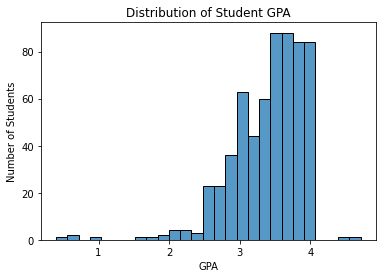

In [13]:
sns.histplot(survey_df['Current GPA'])
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title('Distribution of Student GPA');

First, we can try to see if there is any correlation between eating "healthier" foods like vegetables, fruits, and milk. During our data cleaning process, we standardized the responses for each category so that they are now all the averages for the ranges. This results in ordinal categorical variables with the possible values of [0, 2, 5, 8.5, 9, 11]. We have kept them as numbers in the case that we have to perform both qualitative and quantitative data analysis since we can technically either use them as categories or numbers that we can compute mean/median/etc from. 

### Fruits and Average GPA

When we group the weekly consumption of fruit into its respective value categories, we can find the average GPA for students in each group. There's a general upward trend for average GPA as we increase weekly fruit intake. Based on this data, it's possible there's a correlation between fruit consumption and GPA but we should explore further to figure out the significance. Even though the responses for fruit consumption are numbers, we generally treat them more as categorical variable since students were only given those few multiple choice options when answering the survey. However, instead of solely focusing on the mean GPA for each category, it will be more useful to plot the distribution of GPA for each of categories as a box plot.  

In [14]:
# Group the dataset by the number of times students eat fruit and then find the average GPA for each grouping
fruits_gpa = survey_df.groupby('Fruit')['Current GPA'].mean().reset_index()
fruits_gpa

,Fruit,Current GPA
0,0.0,3.324606
1,2.0,3.350225
2,5.0,3.413560
3,8.5,3.501733
4,11.0,3.531925


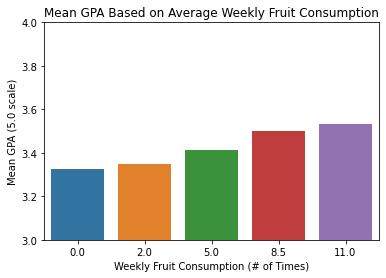

In [15]:
# Plot data onto bar graph to visualize the dataframe
ax = sns.barplot(data=fruits_gpa, x='Fruit', y='Current GPA')
plt.ylim(ymin=3, ymax=4)

# Add labels and title
plt.xlabel('Weekly Fruit Consumption (# of Times)')
plt.ylabel('Mean GPA (5.0 scale)')
plt.title('Mean GPA Based on Average Weekly Fruit Consumption')

# Show the plot
plt.show()

In our boxplot, we can see that the distribution for GPA has the biggest spread for students who consume fruit on average 2 times a week. This means that there's a large range for GPA for students in that category which makes it harder to determine if there's any correlation between fruit consumption and GPA since there's more variability in their academic performance. Notably, each response category besides 0.0 has at least one outlier which could be negatively affecting the mean GPA for their category. For the 11.0 category, the distribution is skewed left based on the median being closer to the third quartile which means that most of the students who ate the most fruit tended to have higher GPAs (GPA more concentrated to higher values). Although this finding does support our hypothesis that eating more healthy foods like fruit, we can't ignore the fact that the other categories also had on average similar GPAs based on their median values, so it's difficult to confirm a correlation. Lets take a look at some of our other variables to see if the trend continues for other foods that are considered to be high in nutritional value.

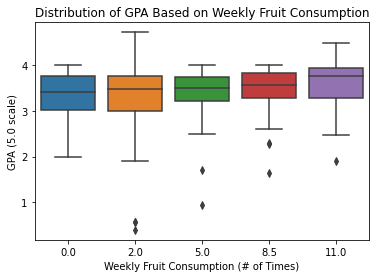

In [16]:
sns.boxplot(data=survey_df, x="Fruit", y="Current GPA")
# Add labels and title
plt.xlabel('Weekly Fruit Consumption (# of Times)')
plt.ylabel('GPA (5.0 scale)')
plt.title('Distribution of GPA Based on Weekly Fruit Consumption')

plt.show()

### Vegetables and Average GPA

However, when we group the average weekly consumption of vegetable variable, there's only a small upward trend for average GPA as we increase weekly vegetable intake when students who eat vegetables on avereage 0 times a week to 8 times a week. Eating the most average vegetables (11) actually has a lower average GPA than eating them 8 times a week. Based on this information, it seems like there is no clear correlation between vegetable consumption and the students' academic performance.

In [17]:
# Group the dataset by the number of times students eat vegetable and then find the average GPA for each grouping
vegetables_gpa = survey_df.groupby('Vegetables')['Current GPA'].mean().reset_index()
vegetables_gpa

,Vegetables,Current GPA
0,0.0,3.278697
1,2.0,3.385028
2,5.0,3.392394
3,8.5,3.497143
4,9.0,3.482785
5,11.0,3.398679


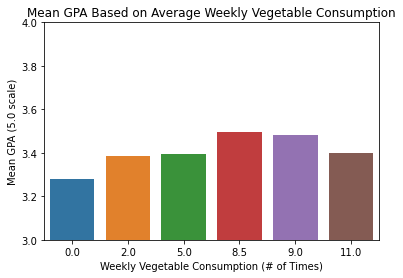

In [18]:
# Plot data onto bar graph to visualize the dataframe
sns.barplot(data=vegetables_gpa, x='Vegetables', y='Current GPA');
plt.ylim(ymin=3, ymax=4)

# Add labels and title
plt.xlabel('Weekly Vegetable Consumption (# of Times)')
plt.ylabel('Mean GPA (5.0 scale)')
plt.title('Mean GPA Based on Average Weekly Vegetable Consumption')

# Show the plot
plt.show()

When we plot the boxplot for the vegetable consumption, we can see that the spread for 2.0 and 11.0 are among the two largest so there's more variability in their GPA distribution. The 5.0 category has multiple outliers, so that could be negatively affecting the mean GPA. There's not much of a difference between the different response categories for the GPA distribution with most of the data clustered towards around the same area (looking at median, 1st quartile, 3rd quartile), so we can't really conclude anything about the correlation between vegetable consumption and GPA. Our graph suggests that there might not be a direct correlation between vegetable consumption and GPA, and that eating more vegetables than the desired amount might not be the most optimal for academic success. As seen above, a drop-off begins towards the latter half of the graph.

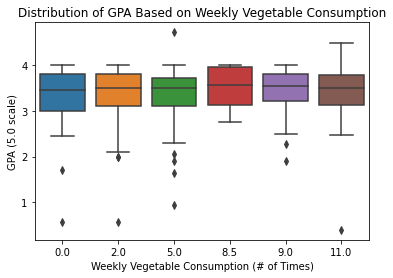

In [19]:
sns.boxplot(data=survey_df, x="Vegetables", y="Current GPA")
# Add labels and title
plt.xlabel('Weekly Vegetable Consumption (# of Times)')
plt.ylabel('GPA (5.0 scale)')
plt.title('Distribution of GPA Based on Weekly Vegetable Consumption')

plt.show()

### Milk and Average GPA

When we group the average weekly consumption of milk variable, there's also an upward trend for average GPA as we increase weekly milk intake. There's a large jump in GPA between a weekly intake of 5 times v.s. 11 times with a difference of around 0.273. Similar to the graph that compared the correlation of fruit consumption and GPA, it seems like there is a positive correlation between milk consumption and the students' academic performance. The data suggests that it might even be the best driving factor in positive increase in those who drink milk the most on an average weekly basis. However, we can't confirm anything without looking at the significance level of this relationship. 

In [20]:
# Group the dataset by the number of times students drink milk and then find the average GPA for each grouping
milk_gpa = survey_df.groupby('Milk')['Current GPA'].mean().reset_index()
milk_gpa

,Milk,Current GPA
0,0.0,3.368492
1,2.0,3.423546
2,5.0,3.429448
3,8.5,3.599091
4,11.0,3.702500


In [21]:
# Difference between weekly consumption of milk 5 times v.s. 11 times
milk_gpa.loc[milk_gpa['Milk'] == 11, 'Current GPA'].item() - milk_gpa.loc[milk_gpa['Milk'] == 5, 'Current GPA'].item()

0.27305172413793066

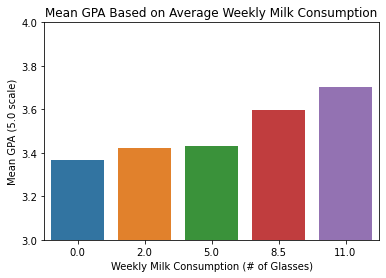

In [22]:
# Plot data onto bar graph to visualize the dataframe
sns.barplot(data=milk_gpa, x='Milk', y='Current GPA');
plt.ylim(ymin=3, ymax=4)

# Add labels and title
plt.xlabel('Weekly Milk Consumption (# of Glasses)')
plt.ylabel('Mean GPA (5.0 scale)')
plt.title('Mean GPA Based on Average Weekly Milk Consumption')

# Show the plot
plt.show()

When we plot the boxplot for the distribution of GPA for milk consumption, we can see that the spread for 0.0 category is much larger than the rest so there's more variability. It's possible that since milk is less regarded as important in a healthy diet (especially for people who are lactose intolerant), more variety of people usually don't drink milk which could lead to the large range in GPA. Also, we can see that the spread for the 11.0 category is small and the distribution is skewed left, which makes us believe that most of the students who drank more glasses of milk tended to have higher GPAs (GPA more concentrated to higher values). 

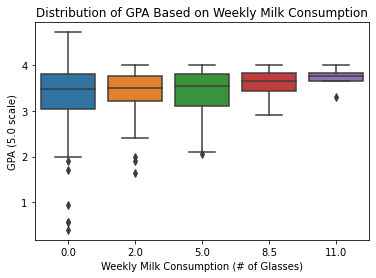

In [23]:
sns.boxplot(data=survey_df, x="Milk", y="Current GPA")
# Add labels and title
plt.xlabel('Weekly Milk Consumption (# of Glasses)')
plt.ylabel('GPA (5.0 scale)')
plt.title('Distribution of GPA Based on Weekly Milk Consumption')

plt.show()

Doing further analysis, we can see that the scatterplot and boxplot doesn't tell the whole story, since distribution of the milk consumption responses was skewed right, so this definitely affects the range/variability for each category. We should keep this in mind when we look at the relationship between milk consumption and GPA, as the higher GPA could just be a result of the few data points collected being so extreme. 

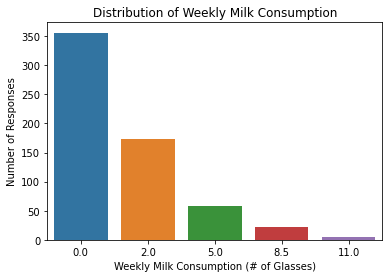

In [24]:
milk_counts = pd.DataFrame(survey_df['Milk'].value_counts()).reset_index()
# Plot data onto bar graph to visualize the dataframe
sns.barplot(data=milk_counts, x='Milk', y='count');

# Add labels and title
plt.xlabel('Weekly Milk Consumption (# of Glasses)')
plt.ylabel('Number of Responses')
plt.title('Distribution of Weekly Milk Consumption')

# Show the plot
plt.show()

### Fast Food and Average GPA
However, when we group the weekly consumption of fast food variable, we can find a downward trend for average GPA as we increase weekly fast food intake. However, it's interesting that students who consume fast food (on average) 8.5 times a week actually had the lowest mean GPA with 2.85 instead of 11 times. It is apparent that an increase in weekly fast food consumption is more likely to correlate with a lower GPA. The downward trend is seemingly consistently linear, suggesting that our hypothesis might be close to the truth.

In [25]:
# Group the dataset by the number of times students consume fast food and then find the average GPA for each grouping
fastfood_gpa = survey_df.groupby('Fast Food')['Current GPA'].mean().reset_index()
fastfood_gpa

,Fast Food,Current GPA
0,0.0,3.494634
1,2.0,3.396577
2,5.0,3.346211
3,8.5,2.854385
4,11.0,3.121429


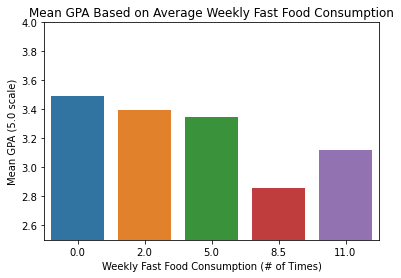

In [26]:
# Plot data onto bar graph to visualize the dataframe
sns.barplot(data=fastfood_gpa, x='Fast Food', y='Current GPA');
plt.ylim(ymin=2.5, ymax=4)

# Add labels and title
plt.xlabel('Weekly Fast Food Consumption (# of Times)')
plt.ylabel('Mean GPA (5.0 scale)')
plt.title('Mean GPA Based on Average Weekly Fast Food Consumption')

# Show the plot
plt.show()

When we plot the boxplot for the distribution of GPA for fast food consumption, we can see that the spread for 2.0 category is much larger than the rest so there's more variability. It's possible that since most people just tend to eat fast food a few times a week, there's more variety of people which could lead to the large range in GPA. This could also explain why there's a lot of outliers for that category as well. Compared to other healthy food box plots, we can actually see the downward trend in their median values when we look at the difference between 8.5 and 11's medians and the 0.0, 2.0, 5.0 category's medians. This again does support our belief that consuming more unhealthy food is correlated with lower academic performance. 

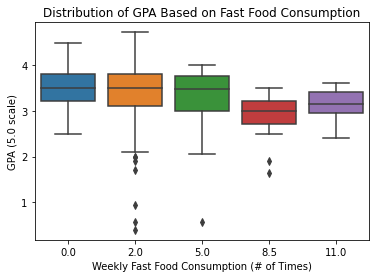

In [27]:
sns.boxplot(data=survey_df, x="Fast Food", y="Current GPA")
# Add labels and title
plt.xlabel('Weekly Fast Food Consumption (# of Times)')
plt.ylabel('GPA (5.0 scale)')
plt.title('Distribution of GPA Based on Fast Food Consumption')

plt.show()

### Soda and Average GPA

Let’s group the weekly soda consumption variable and find if there exists a trend in relation to average GPA.

In [28]:
soda_gpa = survey_df.groupby('Soda')['Current GPA'].mean().reset_index()
soda_gpa

,Soda,Current GPA
0,0.0,3.437403
1,2.0,3.379225
2,5.0,3.317903
3,8.5,3.399536
4,11.0,3.190769


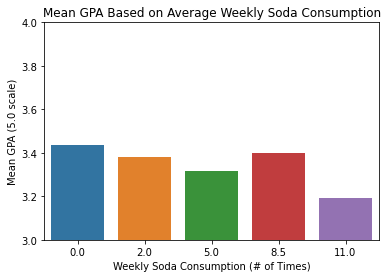

In [29]:
# Plot data onto bar graph to visualize the dataframe
sns.barplot(data=soda_gpa, x='Soda', y='Current GPA');
plt.ylim(ymin=3, ymax=4)
# Add labels and title
plt.xlabel('Weekly Soda Consumption (# of Times)')
plt.ylabel('Mean GPA (5.0 scale)')
plt.title('Mean GPA Based on Average Weekly Soda Consumption')
# Show the plot
plt.show()

At first glance, it seems like there is a potential negative correlation between soda consumption and GPA. We speculate, however, that the overall change is not significant enough to provide any concrete evidence to support the notion that soda consumption hinders academic success. As seen above, while a downward trend begins, the average GPA is similar between moderately-high levels of soda consumption and zero soda consumption. We will attempt to further analyze this relationship in more descriptive models as our research progesses.

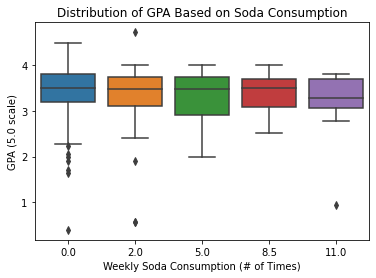

In [30]:
sns.boxplot(data=survey_df, x="Soda", y="Current GPA")
# Add labels and title
plt.xlabel('Weekly Soda Consumption (# of Times)')
plt.ylabel('GPA (5.0 scale)')
plt.title('Distribution of GPA Based on Soda Consumption')

plt.show()

Looking at the boxplot, we can see that the spread for 0.0 category is much larger than the rest so there's more variability. It's possible that since many people tend to not drink soda too often, there's more variety of people which could lead to the large range in GPA. This could also explain why there's a lot of outliers for that category as well. Notably, for the 11.0 category, the distribution for GPA is skewed right which means most of GPAs are clustered to the lower values. However, the distribution for the 5.0 and 8.5 is skewed left which means most of the GPA are clustered to the higher values. This supports our belief that there is no clear relationship between soda consumption and academic performance.

### Energy Drinks and Average GPA

This last plot compares average weekly energy drink consumption to GPA. This, to our group, is data that we are most inruiged to plot since energy drinks are, by nature, not considered healthy nor beneficial in nutritional value. It is, however, very commonly used among college students (including us) to improve focus and energy levels while studying and/or preparing for tests. Therefore while it may not benefit our physical nor mental health, it gives us the tools we may need to pursue our academic endeavors.

In [31]:
energydrinks_gpa = survey_df.groupby('Energy drinks')['Current GPA'].mean().reset_index()
energydrinks_gpa

,Energy drinks,Current GPA
0,0.0,3.414000
1,2.0,3.352174
2,5.0,3.418333
3,8.5,2.715000
4,11.0,2.936667


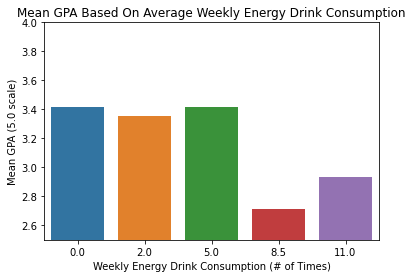

In [32]:
# Plot data onto bar graph to visualize the dataframe
sns.barplot(data=energydrinks_gpa, x='Energy drinks', y='Current GPA')
plt.ylim(ymin=2.5, ymax=4)

# Add labels and title
plt.xlabel('Weekly Energy Drink Consumption (# of Times)')
plt.ylabel('Mean GPA (5.0 scale)')
plt.title('Mean GPA Based On Average Weekly Energy Drink Consumption')

# Show the plot
plt.show()

As seen above, weekly energy drink consumption does seem to have an effect on the GPA of college students. For students who drank energy drinks 8.5 times a week on average, the mean GPA was significantly lower than the other categories. There's a general downward trend for the 

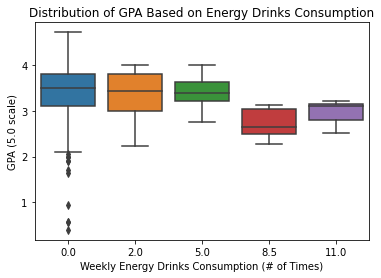

In [33]:
sns.boxplot(data=survey_df, x="Energy drinks", y="Current GPA")
# Add labels and title
plt.xlabel('Weekly Energy Drinks Consumption (# of Times)')
plt.ylabel('GPA (5.0 scale)')
plt.title('Distribution of GPA Based on Energy Drinks Consumption')

plt.show()

Similar to the fast food consumption box plot, we can see that there is a large spread for the 0.0 category. Again, energy drinks aren't meant to be consumed too often, so this can help explain the variety in academic performance since some students just don't drink them regardless of their academic performance. We can see that the median GPA for the 8.5 category is significantly lower than the other categories, just like the mean GPA. However, there is some discrepancy between the distribution for GPA for the 8.5 and 11.0 since the 11.0 has a skewed left distribution (more values concentrated in higher GPA) and 8.5 has a skewed right distribution (more values concentrated in lower GPA). This might be a result of some high academically performing students tend to use energy drinks to study more so students who drink the most energy drinks in our dataset may be reflecting that. The main reason we hypothesize is that it’s negative effects on physical health is balanced out by its ability to give students the necessary energy to complete their scholarly studies. Going forward in our research, we will keep this finding in mind.

### Correlation Matrix Between Food Categories
Although we've explored the relationship between each food consumption category and academic performance, it's also important to see if there's a correlation between the number of times students consume one food category and another. For example, we are grouping fruits, vegetables, and milk into the healthy food category, but do students who eat fruits more also eat vegetables more? In the correlation matrix below, we can see that there is a moderate positive correlation between vegetables and fruits consumption with a 0.51 correlation coefficient. This means that students who tend to eat fruits more are likely to also eat vegetables more or visa versa. Since we're looking at only the correlation, we can't assume causation but there does appear to be relationship between the two variables. Another question is: do students who eat more healthy foods tend to eat less unhealthy food (fast food, soda, energy drinks)? Although it's more weak, there's a negative correlation between vegetable consumption and fast food (-0.29 correlation coefficient) and negative correlation between food consumption and soda (-0.2 correlation coefficient). Based on this information, it does appear that students who eat more fruits and vegetables tend to eat less fast food or the opposite could be true where students who eat fast food tend to eat less fruits/vegetables.

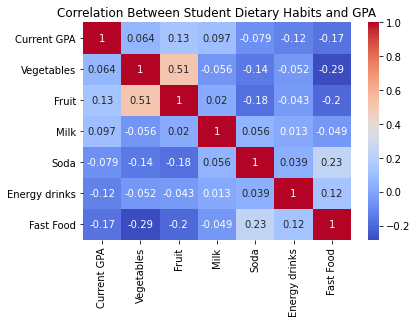

In [34]:
correlation_matrix = survey_df.corr()

# Plotting a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Student Dietary Habits and GPA')
plt.show()

### Multiple Linear Regression Model

This model is particularly useful in your study to predict GPA based on a combination of dietary factors. It helps in understanding the relative impact of each type of dietary intake when other dietary variables are also taken into account, providing a comprehensive picture of how diet influences academic performance.

In [35]:
X = survey_df[['Vegetables', 'Fruit', 'Milk', 'Soda', 'Energy drinks', 'Fast Food']] # Predictor variables
Y = survey_df['Current GPA'] # Response variable
X = sm.add_constant(X) # Adds a constant term to the predictor
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Current GPA   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.203
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           2.47e-06
Time:                        06:35:27   Log-Likelihood:                -441.90
No. Observations:                 614   AIC:                             897.8
Df Residuals:                     607   BIC:                             928.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4221      0.055     62.414

The model's output includes coefficients for each dietary habit, indicating how much the GPA is expected to change with a one-unit increase in that habit, holding all other habits constant. Significant coefficients suggest a notable impact of that dietary habit on GPA. The model's overall significance and the R-squared value indicate how well the combination of dietary habits can predict GPA.

#### What the results above tell us:
- Overall Model Significance: The model’s F-statistic is significant (p < 0.05), indicating that at least one of the predictors is significantly related to GPA.
- R^2: The R-squared value is 0.057, which means that approximately 5.7% of the variability in GPA can be explained by the dietary factors included in the model. This is relatively low, suggesting that other factors not included in the model may also have a significant impact on GPA.
- Most Impactful Dietary Variable: ‘Fast Food’ consumption appears to have the most negative impact on GPA with a coeﬀicient of -0.0332, and it is statistically significant (p = 0.002). This suggests that an increase in Fast Food consumption is closely associated with a decrease in GPA.
- Other Significant Predictors:
    - ‘Fruit’ has a positive coeﬀicient of 0.0182, which is statistically significant (p = 0.022), indicating a beneficial effect on GPA.
    - ‘Milk’ also shows a positive association with GPA, with a coeﬀicient of 0.0212 and is significant (p = 0.025).
    - ‘Energy drinks’ have a negative coeﬀicient of -0.0378 and are statistically significant (p = 0.012), indicating that consumption is associated with lower GPA, which is a surprising finding compared to our original thoughts from our above plots.
- Inconclusive or Non-Impactful Dietary Variables:
    - ‘Vegetables’ show a negative coeﬀicient (-0.0066), but this result is not statistically sig- nificant (p = 0.416), suggesting no clear association with GPA.
    - ‘Soda’ also has a negative coeﬀicient (-0.0079), but like vegetables, it is not statistically significant (p = 0.349), so no definite conclusions can be drawn about its impact on GPA.

### T-tests

The following T-tests compares the means of two groups to see if they are significantly different from each other. It's used when the data are divided into two groups based on some categorical variable.

In [36]:
# Comparing GPA between high vs. low fruit consumption groups
high_fruit = survey_df[survey_df['Fruit'] >= 5]['Current GPA']
low_fruit = survey_df[survey_df['Fruit'] < 5]['Current GPA']
t_stat_fruit, p_value_fruit = ttest_ind(high_fruit, low_fruit)
print("T-test for high vs. low fruit consumption:", t_stat_fruit, "P-value:", p_value_fruit)

# Comparing GPA between high vs. low vegetable consumption groups
high_veg = survey_df[survey_df['Vegetables'] >= 5]['Current GPA']
low_veg = survey_df[survey_df['Vegetables'] < 5]['Current GPA']
t_stat_veg, p_value_veg = ttest_ind(high_veg, low_veg)
print("T-test for high vs. low vegetable consumption:", t_stat_veg, "P-value:", p_value_veg)

# Comparing GPA between high vs. low milk consumption groups
high_milk = survey_df[survey_df['Milk'] >= 5]['Current GPA']
low_milk = survey_df[survey_df['Milk'] < 5]['Current GPA']
t_stat_milk, p_value_milk = ttest_ind(high_milk, low_milk)
print("T-test for high vs. low milk consumption:", t_stat_milk, "P-value:", p_value_milk)

# Comparing GPA between high vs. low fast food consumption groups
high_ff = survey_df[survey_df['Fast Food'] >= 5]['Current GPA']
low_ff = survey_df[survey_df['Fast Food'] < 5]['Current GPA']
t_stat_ff, p_value_ff = ttest_ind(high_ff, low_ff)
print("T-test for high vs. low fast food consumption:", t_stat_ff, "P-value:", p_value_ff)

# Comparing GPA between high vs. low soda consumption groups
high_soda = survey_df[survey_df['Soda'] >= 5]['Current GPA']
low_soda = survey_df[survey_df['Soda'] < 5]['Current GPA']
t_stat_soda, p_value_soda = ttest_ind(high_soda, low_soda)
print("T-test for high vs. low soda consumption:", t_stat_soda, "P-value:", p_value_soda)

# Comparing GPA between high vs. low energy drink consumption groups
high_ed = survey_df[survey_df['Energy drinks'] >= 5]['Current GPA']
low_ed = survey_df[survey_df['Energy drinks'] < 5]['Current GPA']
t_stat_ed, p_value_ed = ttest_ind(high_ed, low_ed)
print("T-test for high vs. low energy drink consumption:", t_stat_ed, "P-value:", p_value_ed)

T-test for high vs. low fruit consumption: 2.661511101660821 P-value: 0.007983313409252596
T-test for high vs. low vegetable consumption: 1.1762795664214438 P-value: 0.23994051469908553
T-test for high vs. low milk consumption: 1.6695122081273859 P-value: 0.09552729596278474
T-test for high vs. low fast food consumption: -2.8750188639861713 P-value: 0.004180471668628033
T-test for high vs. low soda consumption: -1.6576764350340762 P-value: 0.09789525260525521
T-test for high vs. low energy drink consumption: -2.298753725233349 P-value: 0.02185499854312853


The t-test provides a p-value, which tells you whether the difference in means between the two groups is statistically significant. A low p-value (typically <0.05) indicates that the observed difference in GPA between the groups is unlikely due to chance, suggesting a significant impact of that dietary habit on academic performance.


The significant p-values for fruit consumption (p=0.00798), fast food consumption (p=0.00418), and energy drink consumption (p=0.02185) indicate that there are statistically significant differences in GPA between high and low consumption groups for these categories. Specifically, high fruit consumption is associated with higher GPAs, while high consumption of fast food and energy drinks is associated with lower GPAs. Conversely, the comparisons for vegetable (p=0.23994) and milk (p=0.09553) consumption do not show statistically significant differences in GPA, suggesting that the amount of vegetable and milk intake does not significantly affect students' GPA in the sample studied.

## Prediction Model for a Student's GPA Based on their Nutritional Intake (ML)

Currently, our survey data on student GPA contains continuous variables rather than a categorical one. To be able to use a linear SVM classifier for our prediction, we decided to categorize the student GPA as seen below. Our prediction model will then take our predictor data and attempt to predict which category of GPA this student will fall in.

In [37]:
def categorize_gpa(gpa):
    gpa = float(gpa) 
    if 0.00 <= gpa <= 0.99:
        return '0.00 - 0.99'
    elif 1.00 <= gpa <= 1.49:
        return '1.00 - 1.49'
    elif 1.50 <= gpa <= 1.99:
        return '1.50 - 1.99'
    elif 2.00 <= gpa <= 2.49:
        return '2.00 - 2.49'
    elif 2.50 <= gpa <= 2.99:
        return '2.50 - 2.99'
    elif 3.00 <= gpa <= 3.49:
        return '3.00 - 3.49'
    elif 3.50 <= gpa <= 3.99:
        return '3.50 - 3.99'
    else:  # Assuming anything above 4.0 is categorized together
        return '4.0+'

In [38]:
c_survey_df = survey_df
c_survey_df['Current GPA'] = c_survey_df['Current GPA'].apply(categorize_gpa)
c_survey_df.head()

,Current GPA,Vegetables,Fruit,Milk,Soda,Energy drinks,Fast Food
0,1.50 - 1.99,0.0,5.0,0.0,0.0,0.0,2.0
1,3.50 - 3.99,0.0,2.0,0.0,5.0,0.0,2.0
2,4.0+,0.0,0.0,2.0,0.0,0.0,2.0
3,3.50 - 3.99,0.0,0.0,2.0,0.0,0.0,2.0
4,3.50 - 3.99,0.0,0.0,0.0,2.0,0.0,2.0


In [39]:
num_training = (int)(len(c_survey_df) * 0.8)
num_test = len(c_survey_df) - num_training

To model this data, we split our data into survey_X, which includes the fruit, vegetable, milk, energy drink and fast food columns from survey_df (predictors). The outcome variable will be GPA. Assign the outcome variable to the variable survey_Y.

In [40]:
survey_X = X
survey_Y = c_survey_df['Current GPA'].to_numpy()

In [41]:
survey_train_X = survey_X[:num_training]
survey_train_Y = survey_Y[:num_training]
survey_test_X = survey_X[num_training:]
survey_test_Y = survey_Y[num_training:]

To train our model, we'll use a linear SVM classifier. 

In [42]:
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    
    return clf

Now we train our model

In [43]:
survey_clf = train_SVM(survey_train_X, survey_train_Y)

Now we generate predictions from your training and test sets of predictors.

In [44]:
survey_predicted_train_Y = survey_clf.predict(survey_train_X)
survey_predicted_test_Y = survey_clf.predict(survey_test_X)

### Model Assesment

In [45]:
class_report_train = classification_report(survey_train_Y, survey_predicted_train_Y)
print(class_report_train)

              precision    recall  f1-score   support

 0.00 - 0.99       0.00      0.00      0.00         4
 1.50 - 1.99       0.00      0.00      0.00         3
 2.00 - 2.49       0.00      0.00      0.00        12
 2.50 - 2.99       0.00      0.00      0.00        62
 3.00 - 3.49       0.41      0.05      0.08       155
 3.50 - 3.99       0.43      0.98      0.59       206
        4.0+       0.00      0.00      0.00        49

    accuracy                           0.43       491
   macro avg       0.12      0.15      0.10       491
weighted avg       0.31      0.43      0.27       491



It appears that the model's performance is suboptimal, with an overall accuracy of only 43%. The F1-scores across all classes are generally low, indicating poor overall performance. However, the F1-score for the '3.50 - 3.99' range is comparatively higher at 59%, reflecting a better balance between precision and recall for this class.

Support refers to the number of actual occurrences of each class in the dataset. It is evident that the distribution of classes varies, with higher support for certain ranges, particularly '3.00 - 3.49', '3.50 - 3.99', and '4.0+'. This imbalanced distribution could potentially impact the model's performance, especially for classes with lower support.

In [46]:
class_report_test = classification_report(survey_test_Y, survey_predicted_test_Y)
print(class_report_test)

              precision    recall  f1-score   support

 1.50 - 1.99       0.00      0.00      0.00         1
 2.00 - 2.49       0.00      0.00      0.00         2
 2.50 - 2.99       0.00      0.00      0.00        19
 3.00 - 3.49       0.50      0.06      0.11        34
 3.50 - 3.99       0.43      1.00      0.60        51
        4.0+       0.00      0.00      0.00        16

    accuracy                           0.43       123
   macro avg       0.15      0.18      0.12       123
weighted avg       0.32      0.43      0.28       123



The model's performance on the test data mirrors its performance on the training data, with an overall accuracy of 43%. While it demonstrates relatively better precision, recall, and F1-score for the '3.50 - 3.99' range, its effectiveness across other classes remains relatively limited. Similar to the training data evaluation, further investigation is necessary to address the underlying issues contributing to the model's suboptimal performance.

Now we generate a confusion matrix for the training data predictions as well as the ground truth from the survey_df dataset.

In [47]:
conf_mat_train = confusion_matrix(survey_train_Y, survey_predicted_train_Y)
print(conf_mat_train)

[[  0   0   0   0   0   4   0]
 [  0   0   0   0   0   3   0]
 [  0   0   0   0   1  11   0]
 [  0   0   0   0   3  59   0]
 [  0   0   0   0   7 148   0]
 [  0   0   0   0   4 202   0]
 [  0   0   0   0   2  47   0]]


Analysis of Confusion Matrix for Training Data: 
- Majority Class Focus: The model has learned to predict the majority classes relatively better than the minority classes. This is shown by the higher correct predictions in rows for the “3.00 - 3.49” and “3.50 - 3.99” GPA ranges. 
- Neglect of Minority Classes: Very few or no correct predictions are made for the minority classes (“1.50 - 1.99”, “2.00 - 2.49”, “4.0+”), which indicates that the model is not learning features well for these ranges or that there isn’t enough data for the model to learn from. 
- Misclassifications: There are specific patterns of misclassification, such as instances of “3.00 - 3.49” being misclassified as “3.50 - 3.99”. This suggests that the model may be confusing features or there is overlap between these classes that the model cannot distinguish.

In [48]:
conf_mat_test = confusion_matrix(survey_test_Y, survey_predicted_test_Y)
print(conf_mat_test)

[[ 0  0  0  0  1  0]
 [ 0  0  0  1  1  0]
 [ 0  0  0  1 18  0]
 [ 0  0  0  2 32  0]
 [ 0  0  0  0 51  0]
 [ 0  0  0  0 16  0]]


Confusion Matrix for Test Data: 
- Consistent Patterns with Training: The patterns of misclassification are similar to those in the training data, indicating consistency in the model’s learning. This is both good and bad — good because the model isn’t overfitting, but bad because the model’s fundamental performance issues are also consistent. 
- Lack of Predictive Power for Certain Classes: There is a complete lack of predictive power for certain GPA ranges (“1.50 - 1.99”, “2.00 - 2.49”, “4.0+”), as the model did not correctly predict any instances of these classes in the test set. 
- Concentration of Correct Predictions: Correct predictions are concentrated in the middle GPA ranges (“3.00 - 3.99”), with particularly more success in predicting the “3.50 - 3.99” range.

The confusion matrices above give us a more detailed perspective on where our model falls short and which areas in training and testing are lacking. The counts on the diagonal represent correct predictions. The higher the count, the better the model is at predicting that class. However, for many classes, the diagonal counts are very low or zero, indicating poor performance in predicting GPA. The off-diagonal elements represent specific instances of misclassification. Evidently, high counts off the diagonal suggest areas where the model is particularly confused. The misclassifications and the lack of performance on minority classes suggest that we might be using an imbalanced dataset problem. Perhaps the model’s ability to generalize is compromised by the uneven distribution of classes.

### Exploring Ways to Improve Model
Since our current model with linear regression has a pretty low accuracy, we can try implementing other machine learning techniques models to try to improve the accuracy. One way we can do this is using decision trees since they are non-linear and are more robust to irrelevant features. Decision trees work by classifying data using answers to several true or false questions based on the features in a model. We can use a random forest classifier which tend to perform better since regular decision trees have high variance which leads to overfitting. Random forest classifers average the performance of multiple decision trees to get one result.

In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer, FunctionTransformer
from sklearn.compose import ColumnTransformer

To improve our model, we can incorporate some feature engineering to increase the accuracy. Based on our previous analyses, we found that eating fast food on average >=11 times a week had lower mean GPA scores compared to <11 times a week. We can create a feature that binarizes the fast food column so that the model can separate between <11 and >=11 times eating fast food. Then, we can try use only the columns that we found were significant from our t-tests in our model (fruits, energy drinks, fast food) to hopefully increase accuracy by removing redundant features. We then use a pipeline to process these features for the model and then run the random forest classifer fitted with our training data. Finally, we test it on both the training and test data.

In [50]:
preproc = ColumnTransformer(
    transformers=[
        ('fast_food', Binarizer(threshold=10), ['Fast Food']),
        ('keep_cols', FunctionTransformer(lambda x: x), ['Fruit', 'Energy drinks']),
    ],
    remainder='drop'
)

pl = Pipeline([
    ('preprocessor', preproc),
    ('random-forest', RandomForestClassifier())
])

In [51]:
# Split survey data into training and test data
X_train, X_test, y_train, y_test = (
    train_test_split(survey_df.drop(columns=['Current GPA']), survey_df['Current GPA'], random_state=1, test_size=0.25)
)
pl.fit(X_train, y_train)
training_score = pl.score(X_train, y_train)
test_score = pl.score(X_test, y_test)
print(training_score)
print(test_score)

0.44782608695652176
0.43506493506493504


Unfortunately, it looks like the accuracy improved by around 1% for both the training and testing data. Although it's possible we can improve the model with more feature engineering or other machine learning techniques, we have not been able to create a model that can consistently create predictions for a student's GPA based on their food choices with the current data that we have. Looking at our data, we make some guesses on why this might be. Below, we can see that we don't have a lot of data on students with lower GPA, as most of the data we have are on students with 3.00-3.49 and 3.5 - 3.99 GPA. This can make it harder to make accurate predictions for students in those categories.

In [52]:
survey_df.groupby('Current GPA').count()

,Vegetables,Fruit,Milk,Soda,Energy drinks,Fast Food
Current GPA,,,,,,
0.00 - 0.99,4,4,4,4,4,4
1.50 - 1.99,4,4,4,4,4,4
2.00 - 2.49,14,14,14,14,14,14
2.50 - 2.99,81,81,81,81,81,81
3.00 - 3.49,189,189,189,189,189,189
3.50 - 3.99,257,257,257,257,257,257
4.0+,65,65,65,65,65,65


# Ethics & Privacy

The dataset we plan to use would be public information, which would address the concern of data privacy and ensure consent was given. Furthermore, we removed all personally identifiable information such as name, email addresses, and school IDs to ensure aonymity. Potential bias: Given that our dataset is pertaining to students at Florida Gulf Coast University (FGCU), most participants are white, young, well-educated, and urban, which potentially limits the power to generalize the result to people with different levels of wealth, education, and cultures. Also, The data collected strongly relied on self-reported health behaviors and GPAs, thus the accuracy and validity of the data largely depend on students’ honesty. Participants may have intentionally or unintentionally provided incorrect information about their lifestyle choices and their current GPAs for different reasons.
To minimize the biases before our analysis, we will carefully examine the source and methodology of the data collection, and check if there are any gaps or inconsistencies in the data. During data analysis, we will use appropriate statistical methods and visualizations to explore the trend of the data and identify any outliers. We will also test our hypotheses using inferential analysis.

# Discussion and Conclusion

In this research project, we worked towards exploring the relationship between dietary habits and academic performance among college students, motivated by the hypothesis that a nutritionally balanced diet could significantly impact cognitive functions and, consequently, academic success. The study utilized a comprehensive dataset encompassing various aspects of student life, including detailed accounts of dietary intake, to examine the potential predictive power of nutritional habits on students’ Grade Point Average (GPA). Through statistical analyses, including multiple linear regression models, t-tests, and the application of machine learning techniques, our research sought to illuminate the intricate ways in which food consumption patterns might influence or correlate with academic outcomes.

Our initial Exploratory Data Analysis revealed a nuanced landscape of dietary impacts on GPA. Significantly, the consumption of fruits was positively correlated with higher GPAs, suggesting that healthier dietary choices might enhance cognitive functions that are crucial for academic excellence. On the other hand, a negative correlation was observed between the consumption of fast food and energy drinks and GPA, highlighting potential adverse effects of such dietary choices on academic performance. These findings provide support to our original hypothesis, suggesting a link between diet quality and academic success, albeit within the complex web of students' lifestyles and personal choices.

The statistical significance of these correlations was further investigated through t-tests, which compared the mean GPAs between groups with high and low consumption rates of specific food categories. The results underscored the positive impact of fruit consumption and the detrimental effects of fast food and energy drinks on academic performance, reinforcing the notion that dietary habits play a critical role in shaping students’ academic journeys. However, the analysis also revealed that not all dietary components had statistically significant impacts on GPA, indicating the multifaceted nature of academic success and the plethora of factors that contribute to it.

In an attempt to predict student GPA based on dietary intake, our study employed a tried-and-revised machine learning model. Despite our efforts, the model demonstrated limited accuracy, reflecting the challenge of isolating diet as a predictive factor for academic performance amidst a sea of variables. This outcome serves as a reminder of the complexity of human cognition and academic achievement, suggesting that while diet is a significant factor, it operates within a larger ecosystem of influences, including psychological, environmental, and socio-economic factors.

In conclusion, our research contributes to the growing body of evidence on the importance of healthy dietary habits for cognitive function and academic performance. While our findings affirm the positive impact of certain dietary choices, they also show the complexities of predicting academic success based on diet alone. Moving forward,  research that encompasses nutritional science, psychology, and education is crucial to unravel the complex relationship between diet and academic achievement. By fostering healthier dietary habits among college students, we can support their academic endeavors and promote a foundation for lifelong health and success.




# Names

- Evan Kauh
- Julie Li
- Angela Hu
- Yuwen Cen
- Adrian Mendoza